<b>Importing necessary modules

In [67]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


**Convolutional Neural Networks**

In [68]:
!pip install tensorflow opencv-python matplotlib


In [69]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [70]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [71]:
tf.config.list_physical_devices('GPU')

[]

In [72]:
import cv2
import imghdr

In [73]:
data_dir = 'People' 

In [74]:
os.listdir('People')

['Happy', '.DS_Store', 'Sad']

In [75]:
os.listdir(os.path.join(data_dir,'Happy'))

['images26.jpg',
 'images32.jpg',
 'SHPL_S1_FG_101_00002306_Still001_3000-2-1.jpg',
 '05-12-21-happy-people.jpg',
 'image22.jpeg',
 'Happy.jpg',
 'Overtly-Cheerful-Primer-Editorials-min.png',
 'GettyImages-871518740-1024x707.jpg',
 '7-principles-of-successful-and-happy-people.png',
 '170404-happy-workers-feature.jpg',
 'images33.jpg',
 'images27.jpg',
 'image18.jpeg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg',
 'images31.jpg',
 'images25.jpg',
 'images19.jpg',
 'habits-that-define-very-happy-people.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'GettyImages-454356720.jpg',
 'images18.jpg',
 'images24.jpg',
 'images30.jpg',
 'image14.jpeg',
 'png-transparent-graphy-happy-people-love-child-photography-thumbnail.png',
 'image15.jpeg',
 'images34.jpg',
 'images20.jpg',
 'sjnv_cnh7ugnaddm7so6sq.jpg',
 'file-20230208-27-3jttof.jpg',
 'friends_190412.jpg',
 'images21.jpg',
 'images35.jpg',
 'hqdefault.jpg',
 'happy-people-jump-with-raised-ar

In [76]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [77]:
for image_class in os.listdir(data_dir):
    print(image_class)

Happy
.DS_Store
Sad


In [78]:
for image_class in os.listdir(data_dir): 
    class_dir = os.path.join(data_dir, image_class)
    if os.path.isdir(class_dir):  # Check if it's a directory
        for image in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts: 
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print(f"Error processing {image_path}: {e}")
    else:
        print(f"{class_dir} is not a directory and will be skipped.")

People/.DS_Store is not a directory and will be skipped.
Image not in ext list People/Sad/.DS_Store


In [79]:
img = cv2.imread(os.path.join('People','Happy','happiness_thumbnail.jpg'))

In [80]:
type(img)

numpy.ndarray

In [81]:
img

array([[[163, 214, 234],
        [161, 212, 232],
        [159, 210, 230],
        ...,
        [149, 171, 147],
        [149, 171, 147],
        [150, 172, 148]],

       [[163, 214, 234],
        [161, 212, 232],
        [159, 210, 230],
        ...,
        [149, 171, 147],
        [149, 171, 147],
        [150, 172, 148]],

       [[163, 214, 234],
        [161, 212, 232],
        [159, 210, 230],
        ...,
        [149, 171, 147],
        [150, 172, 148],
        [150, 172, 148]],

       ...,

       [[ 74, 135, 231],
        [ 69, 133, 227],
        [ 70, 134, 228],
        ...,
        [ 41, 113, 161],
        [ 47, 119, 167],
        [ 48, 119, 169]],

       [[ 78, 139, 233],
        [ 65, 127, 221],
        [ 65, 132, 225],
        ...,
        [ 46, 117, 161],
        [ 53, 126, 170],
        [ 63, 136, 180]],

       [[ 78, 139, 233],
        [ 65, 127, 221],
        [ 63, 133, 224],
        ...,
        [ 46, 117, 161],
        [ 58, 132, 174],
        [ 71, 145, 187]]

In [82]:
img.shape

(450, 600, 3)

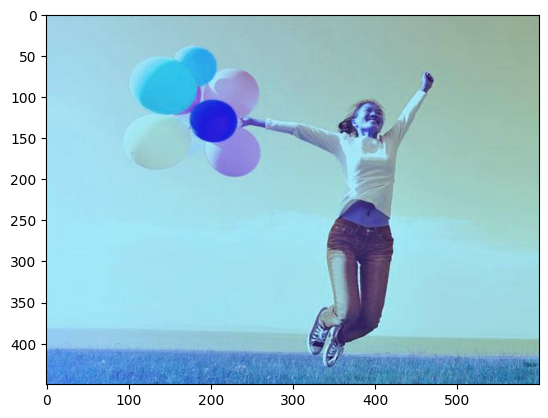

In [83]:
plt.imshow(img)

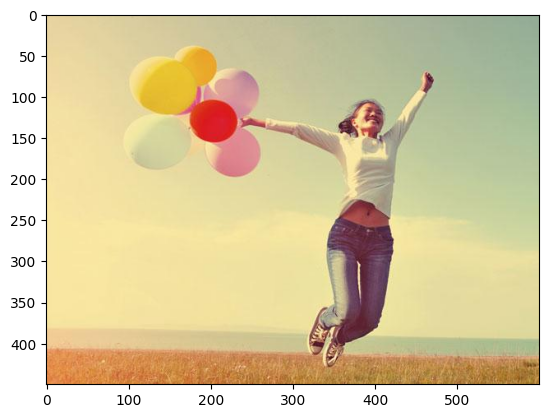

In [84]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [85]:
import numpy as np
from matplotlib import pyplot as plt

In [86]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [87]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [122]:
data = tf.keras.utils.image_dataset_from_directory('People')

Found 311 files belonging to 2 classes.


In [89]:
import numpy as np

In [90]:
data_iterator = data.as_numpy_iterator()

In [91]:
data_iterator

In [99]:
batch=data_iterator.next()

In [100]:
batch

(array([[[[1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
          [1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
          [1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
          ...,
          [1.08036583e+02, 7.20365829e+01, 4.80365829e+01],
          [1.08788834e+02, 7.27888336e+01, 4.87888298e+01],
          [1.09374008e+02, 7.33740082e+01, 4.93740082e+01]],
 
         [[1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
          [1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
          [1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
          ...,
          [1.04785904e+02, 6.87859039e+01, 4.47859039e+01],
          [1.09520233e+02, 7.35202332e+01, 4.95202293e+01],
          [1.00588593e+02, 6.45885925e+01, 4.05885887e+01]],
 
         [[1.40000000e+01, 1.40000000e+01, 1.40000000e+01],
          [1.40000000e+01, 1.40000000e+01, 1.40000000e+01],
          [1.40000000e+01, 1.40000000e+01, 1.40000000e+01],
          ...,
          [1.08315765e+02, 7.23157654e+01, 4.8315

In [101]:
len(batch)

2

In [102]:
batch[0]

array([[[[1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         [1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         [1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         ...,
         [1.08036583e+02, 7.20365829e+01, 4.80365829e+01],
         [1.08788834e+02, 7.27888336e+01, 4.87888298e+01],
         [1.09374008e+02, 7.33740082e+01, 4.93740082e+01]],

        [[1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         [1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         [1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         ...,
         [1.04785904e+02, 6.87859039e+01, 4.47859039e+01],
         [1.09520233e+02, 7.35202332e+01, 4.95202293e+01],
         [1.00588593e+02, 6.45885925e+01, 4.05885887e+01]],

        [[1.40000000e+01, 1.40000000e+01, 1.40000000e+01],
         [1.40000000e+01, 1.40000000e+01, 1.40000000e+01],
         [1.40000000e+01, 1.40000000e+01, 1.40000000e+01],
         ...,
         [1.08315765e+02, 7.23157654e+01, 4.83157692e+01],
         [

In [103]:
# images represented as numpy array
batch[0].shape

(32, 256, 256, 3)

In [104]:
# These are the labels, 1 represents 'Sad' and 0 represents 'Happy'
batch[1]

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int32)

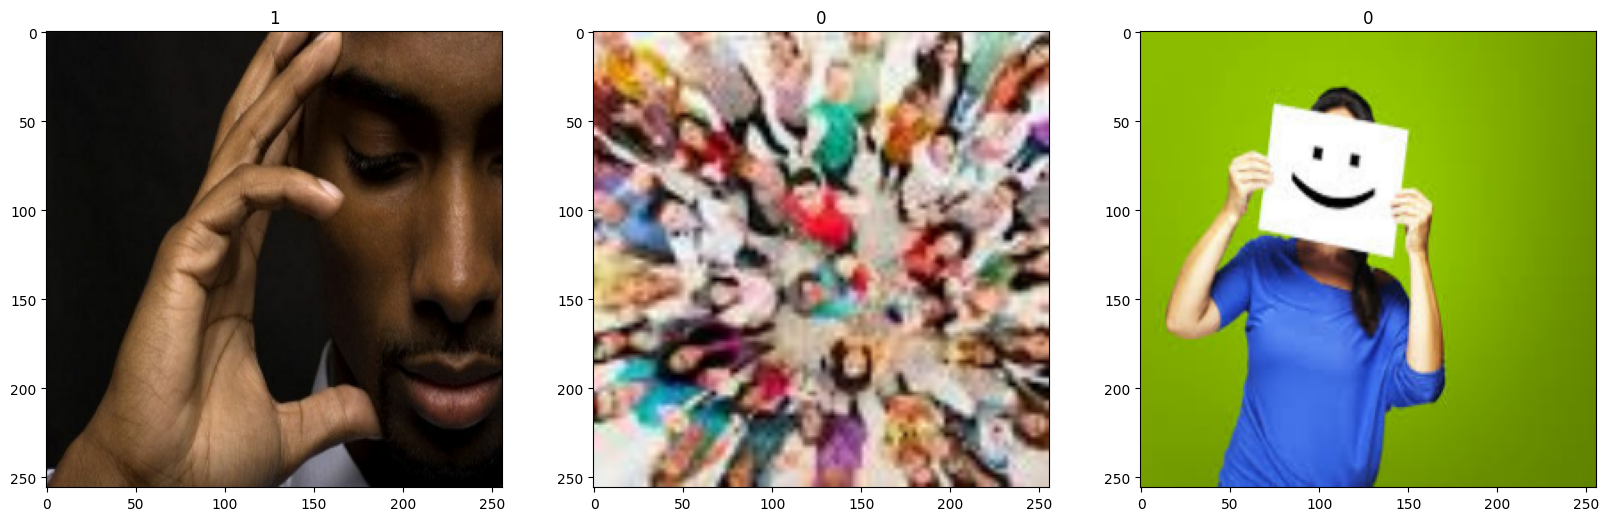

In [105]:
fig, ax = plt.subplots(ncols=3, figsize=(20,20))
for idx, img in enumerate(batch[0][:3]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [106]:
# Preprocess the data
# Scale the Data
batch[0].shape
# These are 32 images of shape 256, 256, 3

(32, 256, 256, 3)

In [108]:
batch[0].min()

0.0

In [109]:
batch[0].max()

255.0

In [110]:
scaled = batch[0]/255

In [111]:
scaled

array([[[[5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
         [5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
         [5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
         ...,
         [4.23672885e-01, 2.82496393e-01, 1.88378751e-01],
         [4.26622868e-01, 2.85446405e-01, 1.91328749e-01],
         [4.28917676e-01, 2.87741214e-01, 1.93623558e-01]],

        [[5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
         [5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
         [5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
         ...,
         [4.10925120e-01, 2.69748628e-01, 1.75631002e-01],
         [4.29491103e-01, 2.88314641e-01, 1.94196984e-01],
         [3.94465059e-01, 2.53288597e-01, 1.59170941e-01]],

        [[5.49019612e-02, 5.49019612e-02, 5.49019612e-02],
         [5.49019612e-02, 5.49019612e-02, 5.49019612e-02],
         [5.49019612e-02, 5.49019612e-02, 5.49019612e-02],
         ...,
         [4.24767703e-01, 2.83591241e-01, 1.89473599e-01],
         [

In [112]:
scaled.min()

0.0

In [113]:
scaled.max()

1.0

In [114]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [123]:
# Instead of doing that process to the Batch. we are doing that process to that whole tensor flow dataset  'data' pipeline
# Check in tf data api --- tf.data.dataset there will be so many functions.
data = data.map(lambda x,y: (x/255, y))

In [124]:
scaled_iterator = data.as_numpy_iterator()

In [125]:
batch = scaled_iterator.next()

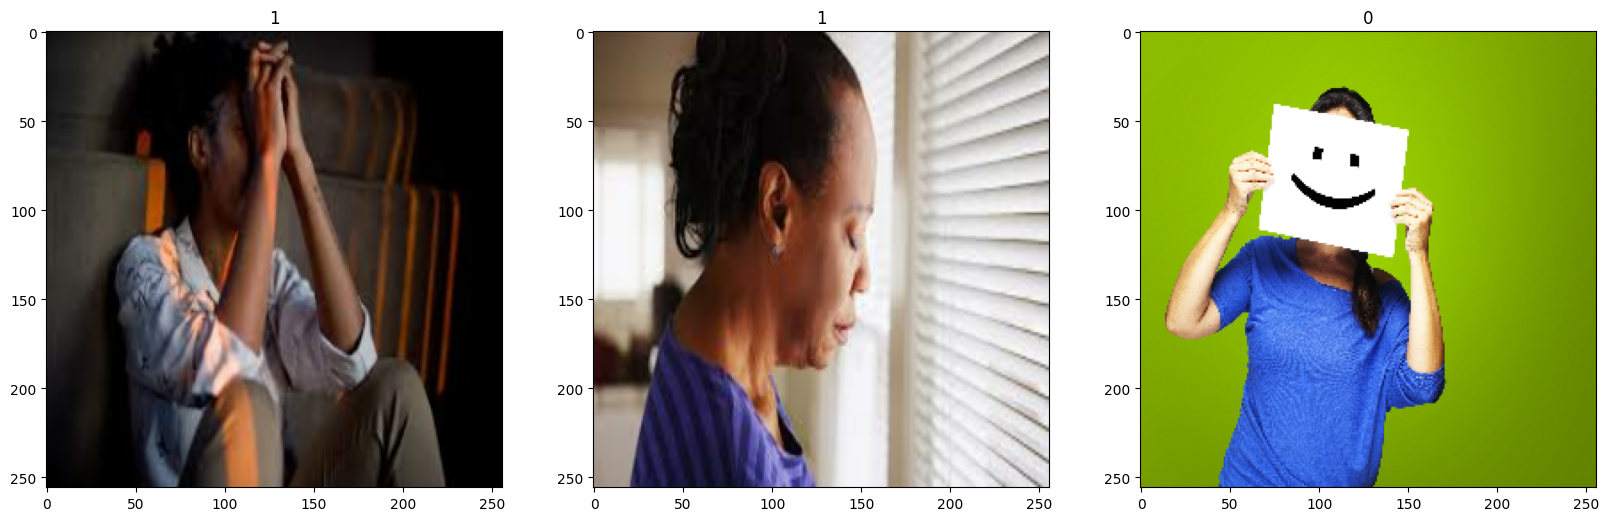

In [126]:
fig, ax = plt.subplots(ncols=3, figsize=(20,20))
for idx, img in enumerate(batch[0][:3]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [132]:
len(data)

10

**Splitting the Data  70 % of the Data goes to Training set, 20 percent of the Data goes to validation set and 10 percent goes to Test set.**

In [128]:
# Splitting the Data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [130]:
train_size

7

In [134]:
val_size

2

In [135]:
test_size

1

In [133]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [137]:
len(train)

7

In [138]:
len(test)

1

**Deep Model**

**Build Deep Learning Model**

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# Conv2D is a convolutional neural network class
# MaxPooling2D is a kind of condensing layer (Max)
# 

In [145]:
# There are two types of API's in tenspr flow one is Sequential and other is functional.
# Sequential is used if there is single input and single output
# Functional is used if there are multiple inputs and multiple outputs
# dense is a fully connected layer in keras.
model = Sequential()

In [147]:
MaxPooling2D??

Init signature:
MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.MaxPooling2D", "keras.layers.MaxPool2D")
class MaxPooling2D(Pooling2D):
    """Max pooling operation for 2D spatial data.

    Downsamples the input along its spatial dimensions (height and width)
    by taking the maximum value over an input window
    (of size defined by `pool_size`) for each channel of the input.
    The window is shifted by `strides` along each dimension.

    The resulting output,
    when using the `"valid"` padding option, has a spatial shape
    (number of rows or columns) of:
    `output_shape = math.floor((input_shape - pool_size) / strides) + 1`
    (when `input_shape >= pool_size`)

    The resulting output shape when using the `"same"` padding option is:
    `output_shape = math.floor((input_shape - 1) / strides) + 1`

    For example, for `strides=(1, 1)` and `padding="valid"`:

    >>

In [146]:
# These are all the deep neural network layers First layer needs to have the input
# This convolution has 16 filters each filter is of size 3 * 3 and a stride of 1.
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
# Three convolutional blocks
# 1 flatten layer
# 2 Dense layers

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# This one is for the output as we are using a sigmoid function and the output will be either 0 or 1.

In [ ]:
# ADAM is an optimizer in tensorflow

In [154]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [155]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

**Train the model**

In [156]:
logdir='logs'

In [157]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [158]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 5s 515ms/step - loss: 0.8563 - accuracy: 0.5357 - val_loss: 0.6960 - val_accuracy: 0.4531
Epoch 2/20
7/7 [==============================] - 4s 500ms/step - loss: 0.6791 - accuracy: 0.4688 - val_loss: 0.6500 - val_accuracy: 0.5156
Epoch 3/20
7/7 [==============================] - 5s 550ms/step - loss: 0.6419 - accuracy: 0.5982 - val_loss: 0.6177 - val_accuracy: 0.7188
Epoch 4/20
7/7 [==============================] - 5s 524ms/step - loss: 0.5860 - accuracy: 0.7634 - val_loss: 0.7288 - val_accuracy: 0.5781
Epoch 5/20
7/7 [==============================] - 4s 505ms/step - loss: 0.5165 - accuracy: 0.7946 - val_loss: 0.5093 - val_accuracy: 0.8125
Epoch 6/20
7/7 [==============================] - 5s 514ms/step - loss: 0.4402 - accuracy: 0.8259 - val_loss: 0.3993 - val_accuracy: 0.8281
Epoch 7/20
7/7 [==============================] - 5s 548ms/step - loss: 0.4523 - accuracy: 0.8170 - val_loss: 0.3803 - val_accuracy: 0.9062
Epoch 8/20
7/7 [====

In [159]:
hist.history

{'loss': [0.8562633395195007,
  0.6790536642074585,
  0.6419407725334167,
  0.5859813094139099,
  0.5164899826049805,
  0.4402463138103485,
  0.45234414935112,
  0.387224018573761,
  0.3814381957054138,
  0.34912940859794617,
  0.24343560636043549,
  0.24396249651908875,
  0.22826948761940002,
  0.21166172623634338,
  0.1709297001361847,
  0.12375407665967941,
  0.10047904402017593,
  0.0971570760011673,
  0.07395390421152115,
  0.05976146087050438],
 'accuracy': [0.5357142686843872,
  0.46875,
  0.5982142686843872,
  0.7633928656578064,
  0.7946428656578064,
  0.8258928656578064,
  0.8169642686843872,
  0.8660714030265808,
  0.8482142686843872,
  0.8348214030265808,
  0.9196428656578064,
  0.9107142686843872,
  0.9375,
  0.9285714030265808,
  0.9464285969734192,
  0.9553571343421936,
  0.96875,
  0.9821428656578064,
  0.9821428656578064,
  0.9821428656578064],
 'val_loss': [0.6959725618362427,
  0.6499606966972351,
  0.6176865696907043,
  0.7288193702697754,
  0.5093101263046265,
  0.

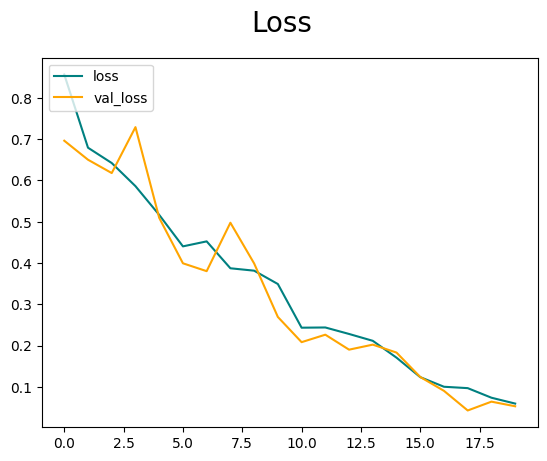

In [160]:
# Plotting the performance

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


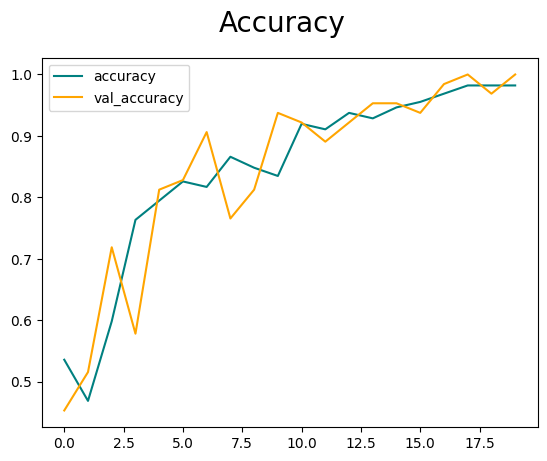

In [161]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Evalusate Performance**

In [162]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [163]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [164]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 202ms/step


In [167]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [168]:
# Testing with a random image

In [169]:
import cv2

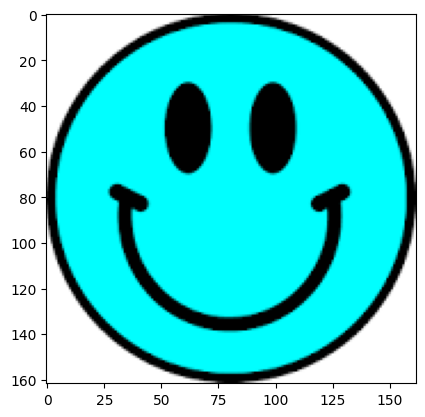

In [172]:
img = cv2.imread('Happy_test.jpg')
plt.imshow(img)
plt.show()

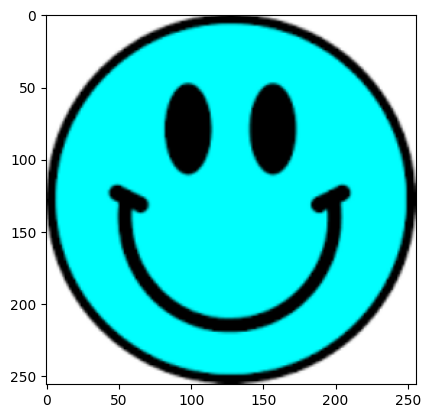

In [173]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [174]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 66ms/step


SyntaxError: expected 'except' or 'finally' block (3905643828.py, line 8)

In [175]:
yhat

array([[0.1558979]], dtype=float32)

In [176]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [177]:
# 11. Save the Model

In [178]:
from tensorflow.keras.models import load_model

In [179]:
model.save(os.path.join('models','imageclassifier.h5'))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [181]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [182]:
yhatnew=new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 109ms/step


In [183]:
if yhatnew > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [ ]:
# https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb
# Link

**Tranfer Learning**

**Google Trained Mobile net V2 model - Trained at Google 1.4 million images, 1000 classes - website : Tensor Flow Hub**

In [ ]:
# https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/18_transfer_learning/cnn_transfer_learning.ipynb
# https://www.youtube.com/watch?v=LsdxvjLWkIY

**Residual Neural Network (RESNET) - Regression Problem**

In [26]:
!pip install opencv-python matplotlib

In [27]:
import os
import cv2
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)